### Let's Work on Some Real Data

## Sentiment Analysis: IMDB Movie Reviews

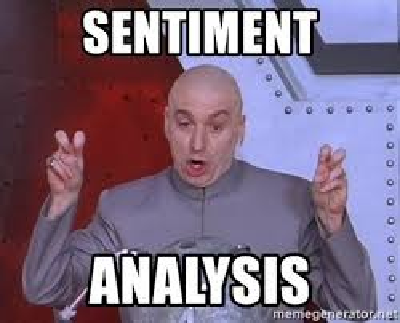

#### The dataset contains a collection of 50,000 reviews from the IMDB Website with an equal number of positive and negative reviews. The task is to predict the polarity (positive or negative) of a given review(text).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

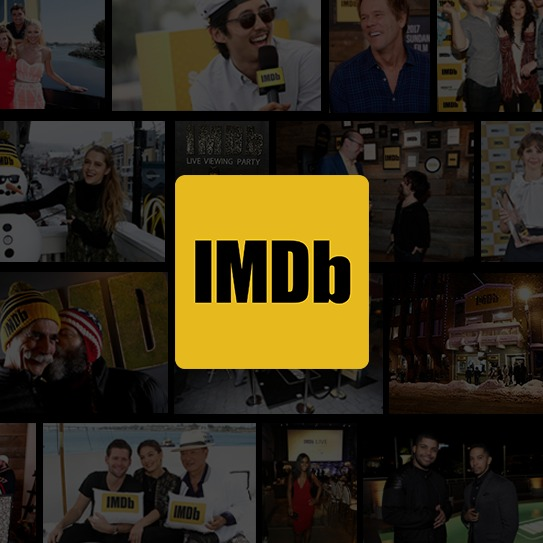

#### Download the dataset from the link below

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Checking if we have any null values in the dataset

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Converting Categorical Labels into Discrete

In [5]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Exploring Data

##### First let's see how positive and negative reviews look like

#### Positive Review Example

In [7]:
positive = data[data.sentiment == 1].sample(n = 1)['review'].iloc[0]
positive

"I didn't catch Gilmore Girls when it first came out, so still doing some catch-up on the first season. I read through most of the users comments and For the negative ones, I have to ask, what show are you watching??<br /><br />This show is a classic, great lines, characters and good acting. And best of all, NOT your standard formula show always with an occasional twist to the story. There are probably more women who see themselves reflected in the Lorelai/Emily relationship then in the Lorelai/Rory relationship. The people and storylines are not PC but they are real!!<br /><br />If you find the dialogue annoying, I suggest you tape the show, so you can rewatch the parts don't understand."

#### Negative Review Example

In [8]:
negative = data[data.sentiment == 0].sample(n = 1)['review'].iloc[0]
negative

"This was one of the worst Wrestlemania's I've seen. It just didn't stand out at all, really. Card wise, I thought it was going to be pretty good, but every match just seemed to fall short.<br /><br />Chris Benoit vs. MVP One of the better matches. Benoit carried it. I just didn't think MVP was that great, but Benoit saved this match. <br /><br />Kane vs. Khali Wow, these two guys don't mix. Or maybe it's Khali and any other person alive don't mix. Awful match.<br /><br />Melina vs. Ashley I'm not a fan of female wrestling.<br /><br />ECW Originals vs. New Breed I was excited about this match, until I saw it. Really, Really disappointing.<br /><br />Edge vs. CM Punk vs. King Booker vs. Jeff Hardy vs. Matt Hardy vs. Mr. Kennedy vs. Finlay vs. Randy Orton Absolutely the worst MITB match so far. Just a major let down, to many people in the ring at the same time. It just didn't live up.<br /><br />Bobby Lashley vs. Umaga O.K. not extremely impressive, but not the worst of the night.<br /><

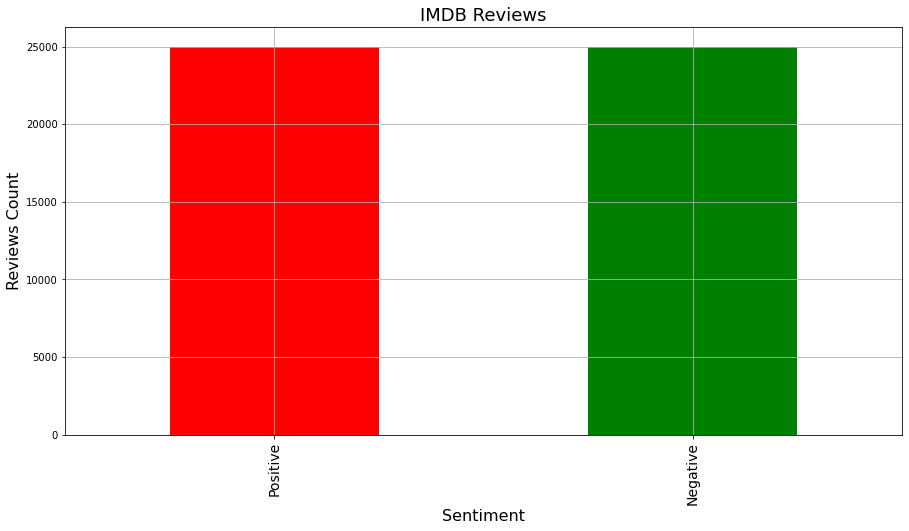

In [9]:
fig, axs = plt.subplots(figsize = (15,7.5))

data['sentiment'].value_counts().plot.bar(color = ['red', 'green'])

plt.xticks(np.arange(2), ('Positive', 'Negative'), fontsize = 14)
axs.set_title('IMDB Reviews', fontsize = 18)
axs.set_xlabel('Sentiment', fontsize = 16)
axs.set_ylabel('Reviews Count', fontsize = 16)
axs.grid()
plt.show()

In [10]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### 1) Removing HTML Tags using Regular Expression

****Let's extract first 10 reviews from the dataset****

In [11]:
sample = data.head(10)

In [12]:
sample.drop(columns = 'sentiment')

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...


In [13]:
doc = []
for text in sample.values:
    doc.append(text)
    

****To remove HTML tags from the data we'll be using these 10 reviews as sample to develop a regular expression****

In [14]:
for i in doc:
    print(doc)

[array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

****Exporting this sample as .txt file. We'll be pasting this sample to regex101 website to come up with a regular expression****

In [15]:
sample.to_csv('document_reviews.txt')

In [16]:
data.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
data1 = []
for review in data.review.values:
    data1.append((review))

In [18]:
data['review'] = data1

#### Dealing with the stopwords

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
stop_words = set(stopwords.words('english'))

****We'll remove 'not' stopword from the corpus of stopwords, as it implies a negative review in the dataset, which is important information****

In [21]:
stopwords = stop_words.remove('not')

In [22]:
import re

#### Preprocessing 

****Removing HTML tags****

****Removing irrelevant characters****

****Converting entire corpus into lower case****

****Removing stopwords****

****Converting entire dataset into lowercase****

****Tokenization****

****Normalization (Lemmatization)****

In [23]:
preprocessed_review = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    review = review.lower()                                 # Converting all the text in reviews to lower case
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    preprocessed_review.append(lemmas)


In [24]:
print(preprocessed_review[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen not got polari voice pat truly see seamless editing guided reference williams diary entry not well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [25]:
len(preprocessed_review)

50000

#### Just for comparison adding our preprocessed column in the dataset

In [26]:
data['preprocessed_review'] = preprocessed_review

In [27]:
data.head(5)

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [28]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [29]:
X = data.drop(['sentiment'], axis = 1)
X.head()

,review,preprocessed_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [30]:
X.shape

(50000, 2)

### BOW Vectorization

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vector = CountVectorizer(min_df = 25)  # min_df parameter implies minimum number of times that a word appears in corpus
                                           # it accepts an integer value (n) and then vectorizes a number only if it appears n times
X_bow = bow_vector.fit_transform(X['preprocessed_review'])

bow_feature_name = bow_vector.get_feature_names()
bow_feature_name = np.array(bow_feature_name)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
X_bow.shape

(50000, 14082)

In [33]:
bow_feature_name.shape

(14082,)

In [34]:
bow_feature_name.size

14082

In [35]:
d = pd.DataFrame(X_bow.toarray(), columns  = bow_feature_name)
d.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_bow, y, test_size = 0.3, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((35000, 14082), (35000,))
shape of testing data is: ((15000, 14082), (15000,))


#### Naive Bayes with BOW Vectorized Reviews

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8502666666666666


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [40]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7507
           1       0.86      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



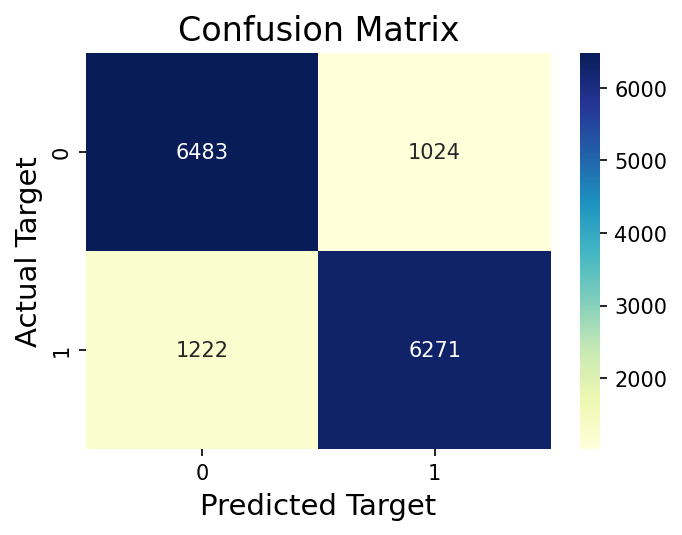

In [41]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')


#### Logistic Regression with BOW Vectorized Reviews

In [42]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(xtrain, ytrain)
logic_pred = logic.predict(xtest)
print(logic_pred)
logic_acc = accuracy_score(ytest, logic_pred)
print(f'Logistic Regression Gave an accuracy  of {logic_acc}')

[1 1 1 ... 1 1 1]
Logistic Regression Gave an accuracy  of 0.8766666666666667


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
logic_report = classification_report(ytest, logic_pred)
print(logic_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7507
           1       0.87      0.88      0.88      7493

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



Text(0.5, 1.0, 'Confusion Matrix')

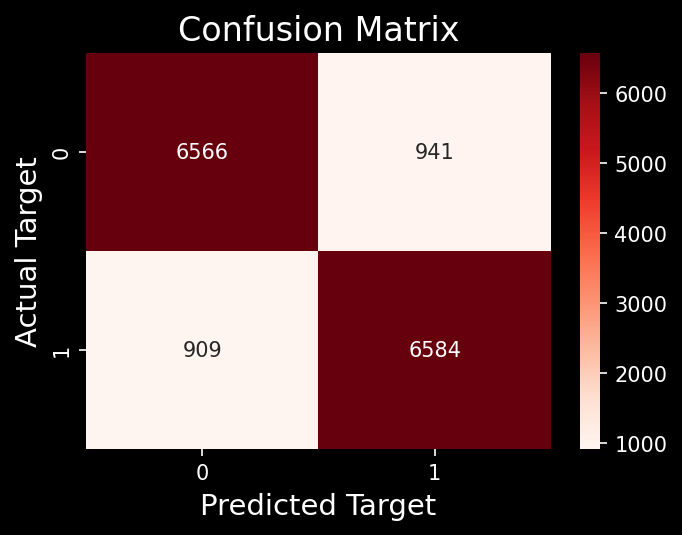

In [44]:
logic_cm = confusion_matrix(ytest, logic_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(logic_cm, annot = True, fmt = 'd', cmap="Reds")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)


#### Decision Tree with BOW Vectorized Reviews

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)

DT_pred = DT.predict(xtest)
print(DT_pred)
        
DT_acc = accuracy_score(ytest, DT_pred)
print(f'Decision Tree gave an accuracy  of {DT_acc}')

[0 1 0 ... 0 1 1]
Decision Tree gave an accuracy  of 0.7169333333333333


In [47]:
DT_report = classification_report(ytest, DT_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7507
           1       0.72      0.72      0.72      7493

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



Text(0.5, 1.0, 'Confusion Matrix')

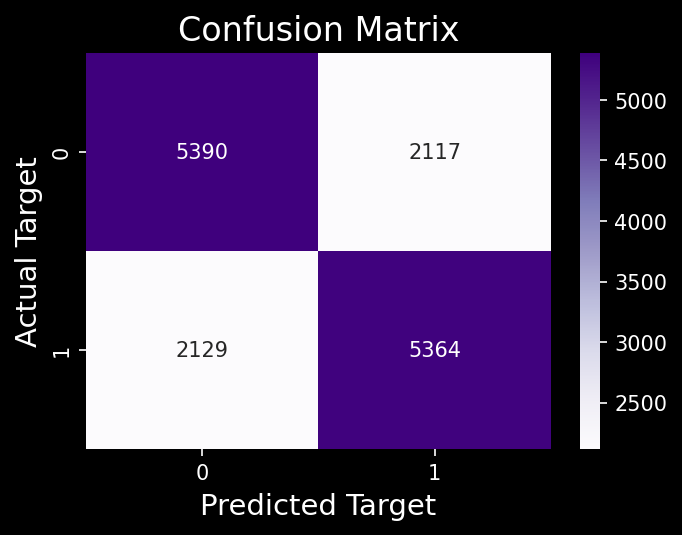

In [48]:
DT_cm = confusion_matrix(ytest, DT_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(DT_cm, annot = True, fmt = 'd', cmap="Purples")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Random Forest with BOW Vectorized Reviews

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)

Rf_pred = RF.predict(xtest)
print(Rf_pred)

[1 1 0 ... 1 1 1]


In [51]:
RF_acc = accuracy_score(ytest, Rf_pred)
print(f'Random Forest gave an accuracy  of {RF_acc}')

Random Forest gave an accuracy  of 0.8494666666666667


In [52]:
RF_report = classification_report(ytest, Rf_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7507
           1       0.85      0.85      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



Text(0.5, 1.0, 'Confusion Matrix')

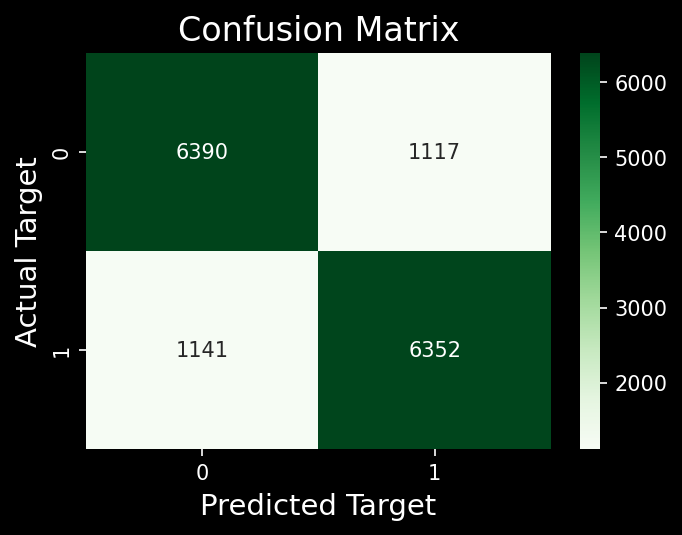

In [53]:
RF_cm = confusion_matrix(ytest, Rf_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap="Greens")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


### TF-IDF Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(X['preprocessed_review'])

tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
X_tfidf.shape

(50000, 14082)

In [56]:
tfidf_feature_name.shape

(14082,)

In [57]:
tfidf_feature_name.size

14082

In [58]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.061968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.214341,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((35000, 14082), (35000,))
shape of testing data is: ((15000, 14082), (15000,))


#### Naive Bayes with TF-IDF Reviews

In [60]:
naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8590666666666666


In [62]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7507
           1       0.86      0.86      0.86      7493

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



Text(0.5, 1.0, 'Confusion Matrix')

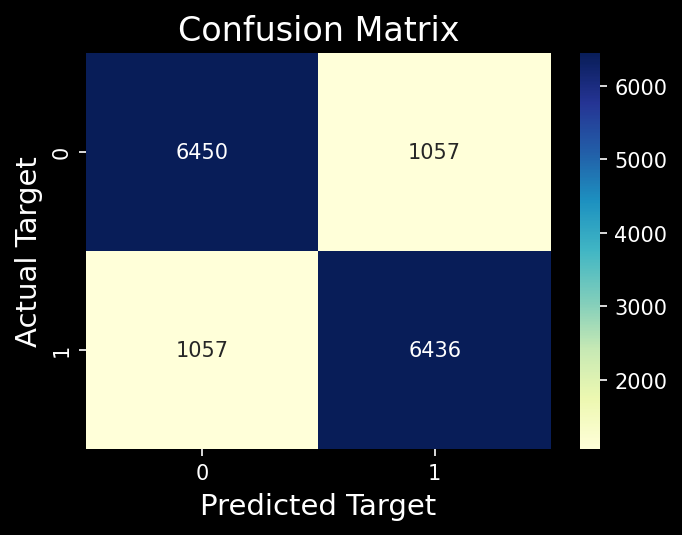

In [63]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Logistic Regression with TF-IDF Vectorized Reviews

In [64]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(xtrain, ytrain)
logic_pred = logic.predict(xtest)
print(logic_pred)
logic_acc = accuracy_score(ytest, logic_pred)
print(f'Logistic Regression Gave an accuracy  of {logic_acc}')

[1 1 1 ... 1 1 1]
Logistic Regression Gave an accuracy  of 0.8878


In [65]:
logic_report = classification_report(ytest, logic_pred)
print(logic_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7507
           1       0.88      0.90      0.89      7493

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



Text(0.5, 1.0, 'Confusion Matrix')

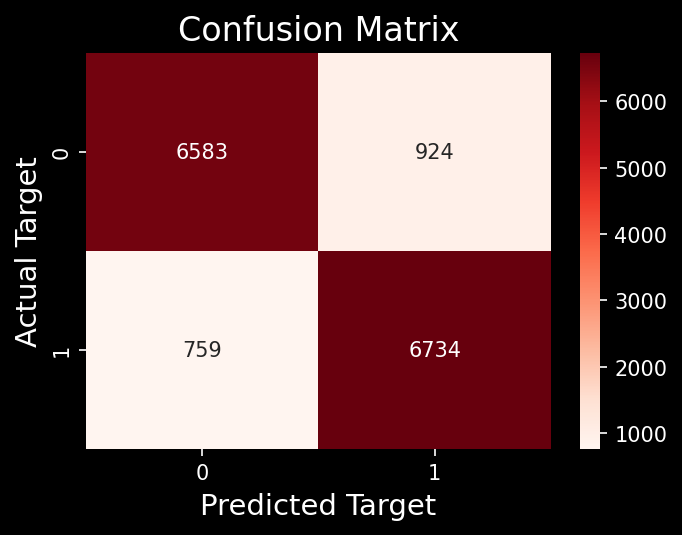

In [66]:
logic_cm = confusion_matrix(ytest, logic_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(logic_cm, annot = True, fmt = 'd', cmap="Reds")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)

#### Decision Tree with TF-IDF Vectorized Reviews

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)

DT_pred = DT.predict(xtest)
print(DT_pred)
        
DT_acc = accuracy_score(ytest, DT_pred)
print(f'Decision Tree gave an accuracy  of {DT_acc}')

[0 1 0 ... 1 0 1]
Decision Tree gave an accuracy  of 0.7162666666666667


In [69]:
DT_report = classification_report(ytest, DT_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      7507
           1       0.71      0.72      0.72      7493

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



Text(0.5, 1.0, 'Confusion Matrix')

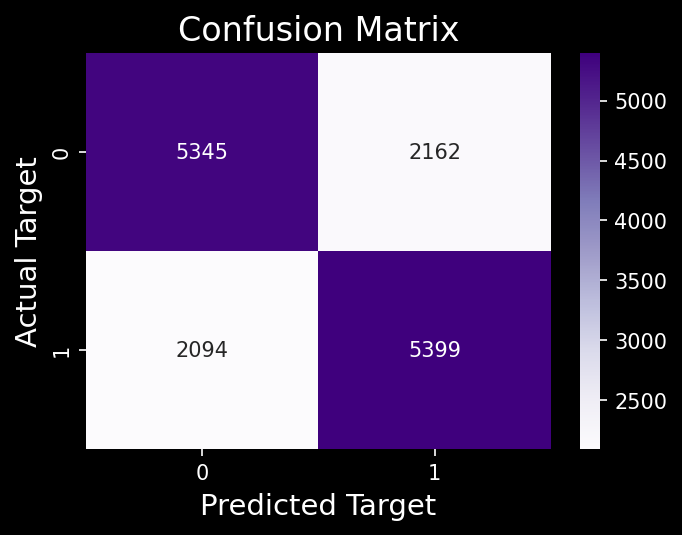

In [70]:
DT_cm = confusion_matrix(ytest, DT_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(DT_cm, annot = True, fmt = 'd', cmap="Purples")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Random Forest with TF-IDF Vectorized Reviews

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)

Rf_pred = RF.predict(xtest)
print(Rf_pred)

[1 1 0 ... 1 1 1]


In [73]:
RF_acc = accuracy_score(ytest, Rf_pred)
print(f'Random Forest gave an accuracy  of {RF_acc}')

Random Forest gave an accuracy  of 0.8484


In [74]:
RF_report = classification_report(ytest, Rf_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7507
           1       0.85      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



Text(0.5, 1.0, 'Confusion Matrix')

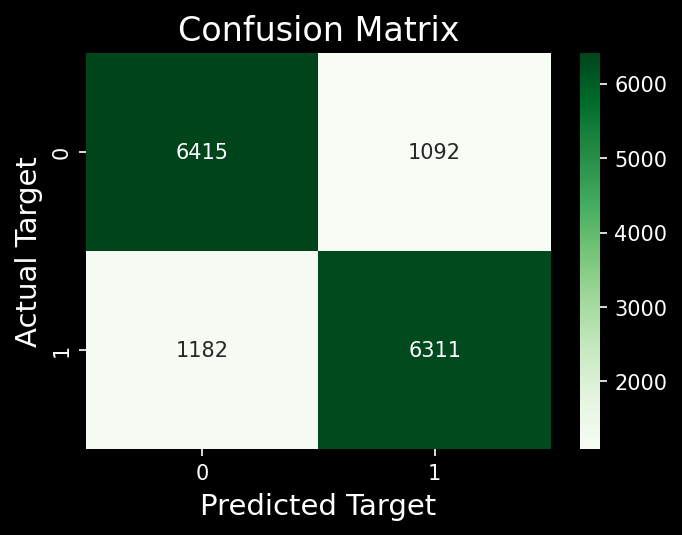

In [75]:
RF_cm = confusion_matrix(ytest, Rf_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap="Greens")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')
